=== EXPENSE DATA EXPLORATION ===

1. DATASET OVERVIEW
Shape: (1013, 7)
Memory usage: 55.53 KB
Date range: 1/1/2024 to 9/9/2023

2. DATA QUALITY
Missing values:
transaction_id    0
date              0
amount            0
category          0
description       0
payment_method    0
merchant          0
dtype: int64

Duplicate transactions:
Total duplicates: 0

3. AMOUNT ANALYSIS
count    1013.000000
mean      -25.782409
std       498.882023
min      -297.950000
25%      -103.240000
50%       -63.770000
75%       -40.030000
max      4500.000000
Name: amount, dtype: float64

Total expenses: $-80,117.58
Total income: $54,000.00
Net amount: $-26,117.58
Average monthly spending: $-6,676.47

4. CATEGORY BREAKDOWN
                 Transaction_Count  Total_Amount  Average_Amount
category                                                        
Groceries                      268     -23040.05          -85.97
Bills_Utilities                 78     -13939.06         -178.71
Shopping                   

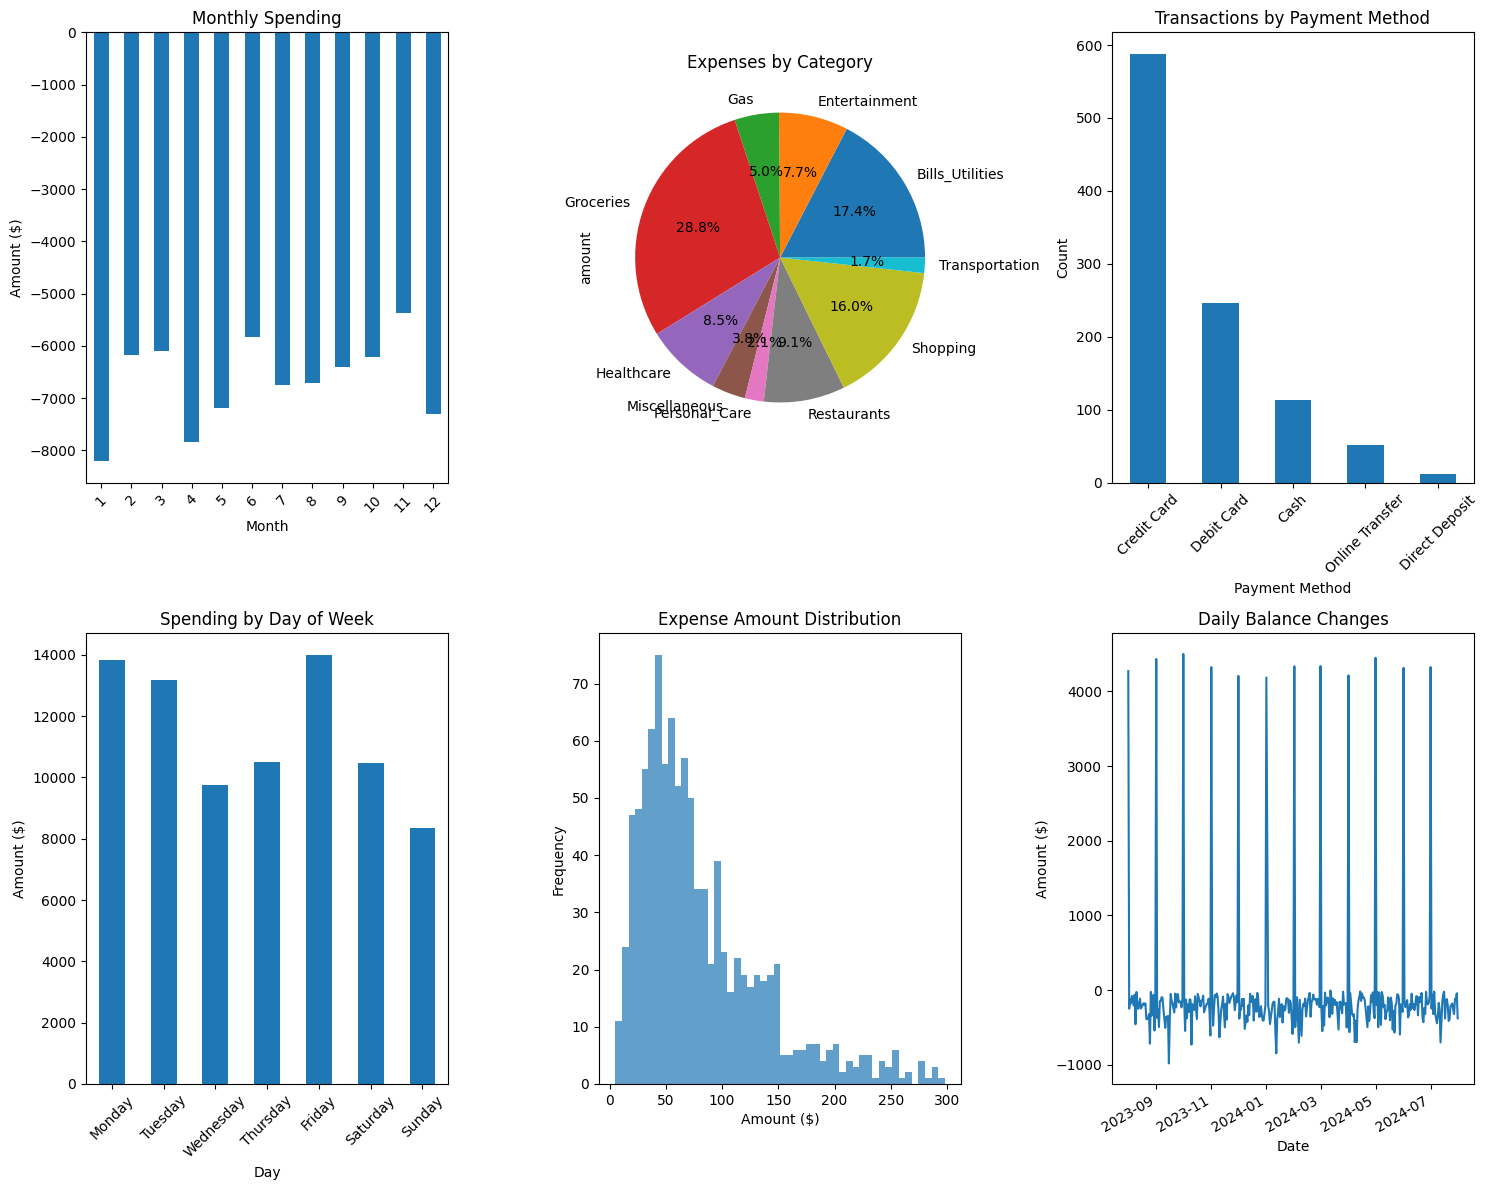

7. KEY INSIGHTS
• Highest spending month: Month 1 ($-8,211.50)
• Lowest spending month: Month 11 ($-5,376.84)
• Most expensive category: Groceries ($23,040.05)
• Most frequent category: Groceries (268 transactions)
• Largest single expense: $-297.95
• Average transaction size: $-80.04

✅ Data exploration complete! Charts saved to docs/ folder
✅ Processed data saved to data/processed/ folder


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load data
df = pd.read_csv(r'C:\Users\SETUP GAME\Projects\expense_analytics_project\data\raw\sample_expenses_2023_2024.csv')

print("=== EXPENSE DATA EXPLORATION ===\n")

# Basic information
print("1. DATASET OVERVIEW")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage().sum() / 1024:.2f} KB")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print()

# Data quality check
print("2. DATA QUALITY")
print("Missing values:")
print(df.isnull().sum())
print()

print("Duplicate transactions:")
print(f"Total duplicates: {df.duplicated().sum()}")
print()

# Amount analysis
print("3. AMOUNT ANALYSIS")
print(df['amount'].describe())
print()

expenses = df[df['amount'] < 0]['amount']
income = df[df['amount'] > 0]['amount']

print(f"Total expenses: ${expenses.sum():,.2f}")
print(f"Total income: ${income.sum():,.2f}")
print(f"Net amount: ${df['amount'].sum():,.2f}")
print(f"Average monthly spending: ${expenses.sum() / 12:,.2f}")
print()

# Category analysis
print("4. CATEGORY BREAKDOWN")
category_summary = df.groupby('category').agg({
    'amount': ['count', 'sum', 'mean']
}).round(2)

category_summary.columns = ['Transaction_Count', 'Total_Amount', 'Average_Amount']
print(category_summary.sort_values('Total_Amount'))
print()

# Payment method analysis
print("5. PAYMENT METHOD USAGE")
payment_summary = df.groupby('payment_method').agg({
    'amount': ['count', 'sum']
}).round(2)
payment_summary.columns = ['Transaction_Count', 'Total_Amount']
print(payment_summary)
print()

# Date pattern analysis
print("6. TEMPORAL PATTERNS")
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['date'].dt.dayofweek >= 5

monthly_spending = df[df['amount'] < 0].groupby('month')['amount'].sum()
print("Monthly spending totals:")
print(monthly_spending.sort_values())
print()

weekend_spending = df[df['amount'] < 0].groupby('is_weekend')['amount'].sum()
print("Weekday vs Weekend spending:")
print(weekend_spending)
print()

# Create visualizations
plt.figure(figsize=(15, 12))

# 1. Monthly spending trend
plt.subplot(2, 3, 1)
monthly_spending.plot(kind='bar')
plt.title('Monthly Spending')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)

# 2. Category breakdown
plt.subplot(2, 3, 2)
expense_categories = df[df['amount'] < 0].groupby('category')['amount'].sum().abs()
expense_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Expenses by Category')

# 3. Payment method usage
plt.subplot(2, 3, 3)
payment_counts = df['payment_method'].value_counts()
payment_counts.plot(kind='bar')
plt.title('Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 4. Daily spending pattern
plt.subplot(2, 3, 4)
daily_spending = df[df['amount'] < 0].groupby('day_of_week')['amount'].sum().abs()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_spending = daily_spending.reindex(day_order)
daily_spending.plot(kind='bar')
plt.title('Spending by Day of Week')
plt.xlabel('Day')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)

# 5. Amount distribution
plt.subplot(2, 3, 5)
expenses_only = df[df['amount'] < 0]['amount'].abs()
plt.hist(expenses_only, bins=50, alpha=0.7)
plt.title('Expense Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

# 6. Time series
plt.subplot(2, 3, 6)
daily_totals = df.groupby('date')['amount'].sum()
daily_totals.plot()
plt.title('Daily Balance Changes')
plt.xlabel('Date')
plt.ylabel('Amount ($)')

plt.tight_layout()
plt.savefig(r'C:\Users\SETUP GAME\Projects\expense_analytics_project\docs\initial_exploration_charts.png', dpi=300, bbox_inches='tight')
plt.show()

# Key insights
print("7. KEY INSIGHTS")
print(f"• Highest spending month: Month {monthly_spending.idxmin()} (${monthly_spending.min():,.2f})")
print(f"• Lowest spending month: Month {monthly_spending.idxmax()} (${monthly_spending.max():,.2f})")
print(f"• Most expensive category: {expense_categories.idxmax()} (${expense_categories.max():,.2f})")
print(f"• Most frequent category: {df['category'].value_counts().index[0]} ({df['category'].value_counts().iloc[0]} transactions)")
print(f"• Largest single expense: ${expenses.min():,.2f}")
print(f"• Average transaction size: ${expenses.mean():,.2f}")

# Save processed data for next steps
df.to_csv(r'C:\Users\SETUP GAME\Projects\expense_analytics_project\data\processed\expenses_with_datetime.csv', index=False)
print("\n✅ Data exploration complete! Charts saved to docs/ folder")
print("✅ Processed data saved to data/processed/ folder")